In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ujjwalchowdhury/walmartcleaned")

print("Path to dataset files:", path)

100%|██████████| 4.32M/4.32M [00:00<00:00, 8.85MB/s]

Extracting files...


Path to dataset files: C:\Users\KimDongyoung\.cache\kagglehub\datasets\ujjwalchowdhury\walmartcleaned\versions\1


In [3]:
import os
import pandas as pd

# 데이터 파일 경로 생성 (예: 'Walmart.csv' 파일이 있다고 가정)
csv_path = os.path.join(path, 'walmart_cleaned.csv')

# 데이터 불러오기
df = pd.read_csv(csv_path)
print(df.head())

   Unnamed: 0  Store        Date  IsHoliday  Dept  Weekly_Sales  Temperature  \
0           0      1  2010-02-05          0   1.0      24924.50        42.31   
1           1      1  2010-02-05          0  26.0      11737.12        42.31   
2           2      1  2010-02-05          0  17.0      13223.76        42.31   
3           3      1  2010-02-05          0  45.0         37.44        42.31   
4           4      1  2010-02-05          0  28.0       1085.29        42.31   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        0.0        0.0        0.0        0.0        0.0   
1       2.572        0.0        0.0        0.0        0.0        0.0   
2       2.572        0.0        0.0        0.0        0.0        0.0   
3       2.572        0.0        0.0        0.0        0.0        0.0   
4       2.572        0.0        0.0        0.0        0.0        0.0   

          CPI  Unemployment  Type    Size  
0  211.096358         8.106     3  151315 

In [4]:
df

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
1,1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
2,2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
3,3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
4,4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,423281,45,2012-10-26,0,13.0,26240.14,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
421566,423282,45,2012-10-26,0,16.0,2660.02,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
421567,423283,45,2012-10-26,0,32.0,4131.54,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221
421568,423284,45,2012-10-26,0,83.0,717.82,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2,118221


c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\KimDongyoung\AppData\Local\Programs\

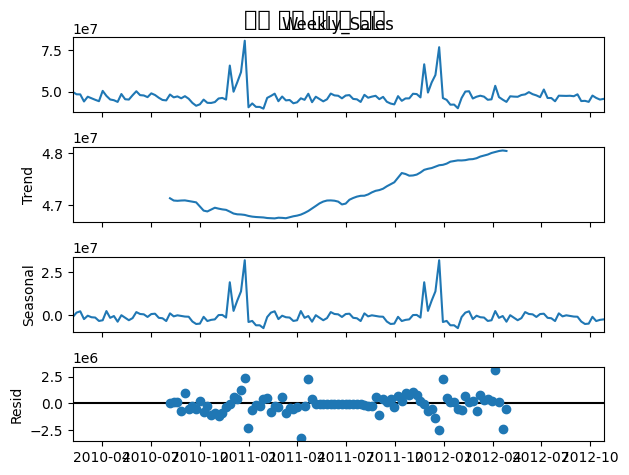

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# 'Date' 컬럼을 datetime으로 변환
df['Date'] = pd.to_datetime(df['Date'])

# 주별로 매출을 합산 (Store 전체, 모든 Dept 합산)
weekly_sales = df.groupby('Date')['Weekly_Sales'].sum().sort_index()

# 시계열 분해 (additive model)
result = seasonal_decompose(weekly_sales, model='additive')

result.plot()

plt.suptitle('주간 매출 시계열 분해', fontsize=16)
plt.show()

c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2407.205
Date:                Wed, 21 May 2025   AIC                           4820.410
Time:                        09:56:13   BIC                           4829.277
Sample:                    02-05-2010   HQIC                          4824.013
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4556      0.065      6.965      0.000       0.327       0.584
ma.L1         -0.9767      0.038    -25.432      0.000      -1.052      -0.901
sigma2      3.067e+13   7.95e-16   3.86e+28      0.0

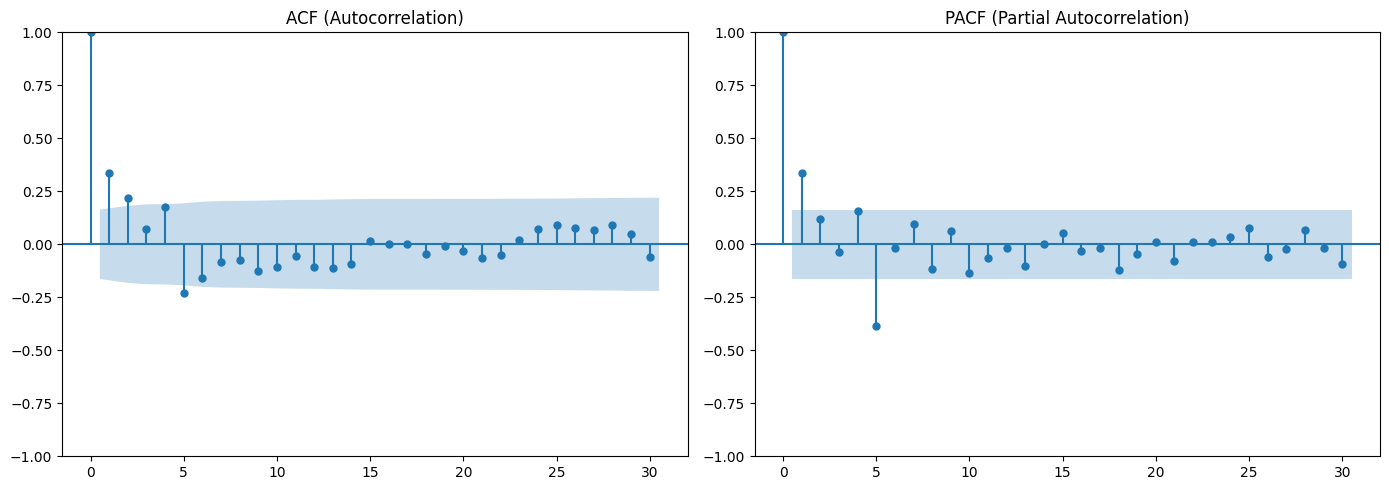

In [11]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ARIMA 모델 학습 (예: (p=1, d=1, q=1))
model = ARIMA(weekly_sales, order=(1, 1, 1))
arima_result = model.fit()

# 요약 출력
print(arima_result.summary())

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_acf(weekly_sales, ax=axes[0], lags=30)
axes[0].set_title('ACF (Autocorrelation)')
plot_pacf(weekly_sales, ax=axes[1], lags=30, method='ywm')
axes[1].set_title('PACF (Partial Autocorrelation)')
plt.tight_layout()
plt.show()

In [13]:
from statsmodels.tsa.stattools import adfuller

# ADF(augmented Dickey-Fuller) 검정 수행
adf_result = adfuller(weekly_sales)

print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
for key, value in adf_result[4].items():
  print(f'Critical Value ({key}): {value}')
  
  if adf_result[1] < 0.05:
    print("p-value가 0.05보다 작으므로, 시계열은 정상성(stationary)을 가진다고 볼 수 있습니다.")
  else:
    print("p-value가 0.05보다 크므로, 시계열은 정상성이 없다고 볼 수 있습니다.")

ADF Statistic: -5.908297957186334
p-value: 2.675979158986027e-07
Critical Value (1%): -3.47864788917503
p-value가 0.05보다 작으므로, 시계열은 정상성(stationary)을 가진다고 볼 수 있습니다.
Critical Value (5%): -2.882721765644168
p-value가 0.05보다 작으므로, 시계열은 정상성(stationary)을 가진다고 볼 수 있습니다.
Critical Value (10%): -2.578065326612056
p-value가 0.05보다 작으므로, 시계열은 정상성(stationary)을 가진다고 볼 수 있습니다.


In [14]:
# ARIMA 모델로 예측 (예: 마지막 10주 예측)
forecast = arima_result.get_forecast(steps=10)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

print("ARIMA 예측값:")
print(forecast_values)

print("\n예측 신뢰구간:")
print(forecast_conf_int)

ARIMA 예측값:
2012-11-02    4.631238e+07
2012-11-09    4.666243e+07
2012-11-16    4.682193e+07
2012-11-23    4.689460e+07
2012-11-30    4.692771e+07
2012-12-07    4.694279e+07
2012-12-14    4.694967e+07
2012-12-21    4.695280e+07
2012-12-28    4.695423e+07
2013-01-04    4.695488e+07
Freq: W-FRI, Name: predicted_mean, dtype: float64

예측 신뢰구간:
            lower Weekly_Sales  upper Weekly_Sales
2012-11-02        3.545824e+07        5.716653e+07
2012-11-09        3.462751e+07        5.869736e+07
2012-11-16        3.450472e+07        5.913913e+07
2012-11-23        3.449261e+07        5.929659e+07
2012-11-30        3.449219e+07        5.936322e+07
2012-12-07        3.448932e+07        5.939627e+07
2012-12-14        3.448373e+07        5.941561e+07
2012-12-21        3.447656e+07        5.942904e+07
2012-12-28        3.446862e+07        5.943983e+07
2013-01-04        3.446031e+07        5.944944e+07


In [16]:
from pmdarima import auto_arima

# auto_arima로 최적의 (p,d,q) 파라미터 찾기 및 모델 학습
auto_model = auto_arima(weekly_sales, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

print("Best ARIMA order:", auto_model.order)
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=4855.994, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5462.768, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5370.491, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=4853.809, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=5343.635, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=4830.601, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=4834.617, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4829.490, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=4844.691, Time=0.01 s

In [17]:
# auto_arima에서 찾은 최적의 order로 ARIMA 모델 재학습 및 예측
best_order = auto_model.order
best_arima_model = ARIMA(weekly_sales, order=best_order)
best_arima_result = best_arima_model.fit()

# 마지막 10주 예측
best_forecast = best_arima_result.get_forecast(steps=10)
best_forecast_values = best_forecast.predicted_mean
best_forecast_conf_int = best_forecast.conf_int()

print("최적 ARIMA 예측값:")
print(best_forecast_values)

print("\n예측 신뢰구간:")
print(best_forecast_conf_int)

최적 ARIMA 예측값:
2012-11-02    4.641214e+07
2012-11-09    4.671883e+07
2012-11-16    4.691311e+07
2012-11-23    4.700712e+07
2012-11-30    4.705810e+07
2012-12-07    4.708438e+07
2012-12-14    4.709824e+07
2012-12-21    4.710547e+07
2012-12-28    4.710926e+07
2013-01-04    4.711124e+07
Freq: W-FRI, Name: predicted_mean, dtype: float64

예측 신뢰구간:
            lower Weekly_Sales  upper Weekly_Sales
2012-11-02        3.641576e+07        5.640851e+07
2012-11-09        3.629578e+07        5.714188e+07
2012-11-16        3.628727e+07        5.753895e+07
2012-11-23        3.633776e+07        5.767649e+07
2012-11-30        3.637552e+07        5.774067e+07
2012-12-07        3.639835e+07        5.777042e+07
2012-12-14        3.641123e+07        5.778524e+07
2012-12-21        3.641820e+07        5.779273e+07
2012-12-28        3.642192e+07        5.779659e+07
2013-01-04        3.642388e+07        5.779860e+07


c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
